# <font style="color:rgb(50,120,229)">Blurring</font>

## <font style="color:rgb(50,120,229)"> Overview</font>

In this module, we will cover the following topics.

1. **Box Blur**
1. **Gaussian Blur**
2. **Median Blur**
3. **Bilateral Filtering**
4. **Bilateral vs Median: Comparison under different noise conditions**

# <font style = "color:rgb(50,120,229)">Box Blur</font>
A very common use case for convolution is blurring or smoothing or Low pass filtering. It reduces the noise in the image. The noise in an image can be due to **external factors** like poor lighting or environment or **internal factors** like a few pixels in the sensor may have gone bad. We can use image blurring/smoothing techniques to get rid of different types of noise.

In the previous example, we saw how to create a smoothing filter by convolving the image with a 5x5 kernel. The 3x3 version of that kernel looks like this

$$
\frac{1}{9} 
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

As shown in the previous example, we can create this kernel and apply it to this image using **filter2D**. However, because blurring is such a common operation, OpenCV provides a direct function called [**`blur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) for blurring an image. Internally, blur uses [**`filter2D`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). 

## <font style="color:rgb(50,120,229)">Box Blur in OpenCV</font>

The simplest usage of the blur function is given below

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.blur(	src, ksize[, dst[, anchor[, borderType]]]	)
```
**Parameters**
- **`src`**	input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	blurring kernel size.
- **`anchor`**	anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
- **`borderType`**	border mode used to extrapolate pixels outside of the image.

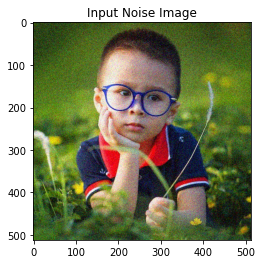

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "data/images/gaussian-noise.png"

# Load an image
img = cv2.imread(filename)

# Show The Original Input Image
plt.imshow(img[...,::-1])
plt.title("Original Noise Image")
plt.show()

Apply box filtering with two kernels of sizes 3 and 7 with the 'blur' function. The first parameter passed is the input image and second parameter is the kernel size.

In [14]:
# Apply box filter - kernel size 3
box_blur3 = cv2.blur(img, (3,3), (-1,-1))

# Apply box filter - kernel size 7
box_blur7 = cv2.blur(img, (7,7), (-1,-1))

**<font style = "color:rgb(255,0,0)">Note:</font>** We did not have to explicitly specify the kernel because the blur function assumes the kernel is a normalized box kernel.

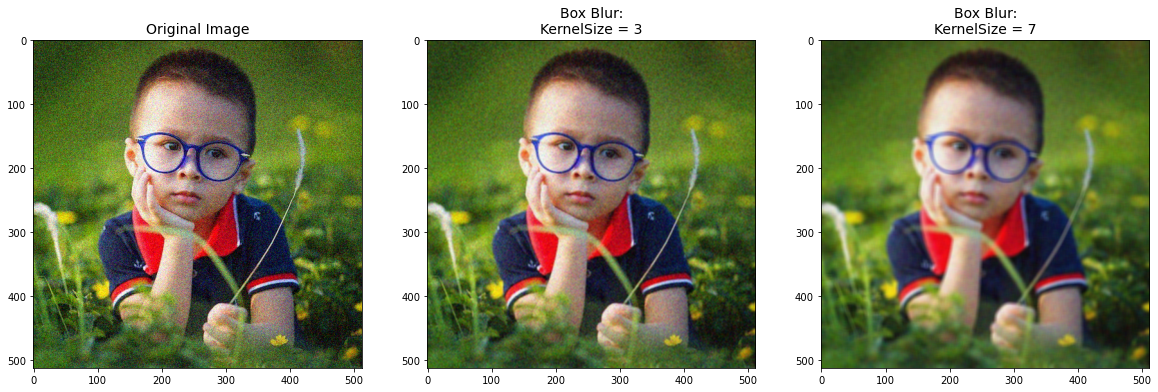

In [15]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image", fontsize=14)
plt.subplot(132);plt.imshow(box_blur3[...,::-1]);plt.title("Box Blur:\nKernelSize = 3", fontsize=14)
plt.subplot(133);plt.imshow(box_blur7[...,::-1]);plt.title("Box Blur:\nKernelSize = 7", fontsize=14)
plt.show()

You can see that the noise can be reduced by increasing the kernel size. But at the same time, the image becomes more and more blurry.

# <font style = "color:rgb(50,120,229)">Gaussian Blur</font>

The box kernel explained in the previous section, weights the contribution of all pixels in the neighborhood equally. A Gaussian Blur kernel, on the other hand, weights the contribution of a neighboring pixel based on the distance of the pixel from the center pixel.

Remember the friendly bell-curve that made your grades look good as long as everybody else performed poorly on their tests? The bell-curve or the Gaussian is given by the following equation.
$$
G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{x^2}{2\sigma^2}}
$$
The shape of the curve is controlled a single parameter called $\sigma$  that controls the peakiness of the bell curve.
$$
G(x,\;y) = \frac{1}{2\pi\sigma^2}\exp^{-\frac{x^2 \;+ \;y^2}{2\sigma^2}}
$$

The Gaussian kernel is based on the same equation, except it is in 2D. Instead of a curve, you can think of an upside down bowl. A bigger $\sigma$ creates a kernel that blurs more. 

A 5x5 Gaussian kernel with ${\sigma}=1$ is given by 

$$\frac{1}{337} \begin{bmatrix} 1 & 4 & 7 & 4 & 1 \\ 4 & 20 & 33 & 20 & 4 \\
7 & 33 & 55 & 33 & 7 \\ 4 & 20 & 33 & 20 & 4 \\ 1 & 4 & 7 & 4 & 1 \end{bmatrix}$$

Unlike the box kernel, the Gaussian kernel is not uniform. The middle pixel gets the maximum weight while the pixels farther away are given less weight. 

An image blurred using the Gaussian kernel looks less blurry compared to a box kernel of the same size. Small amount of Gaussian blurring is frequently used to remove noise from an image. It is also applied to the image prior to a noise sensitive image filtering operations. For example, the Sobel kernel used for calculating the derivative of an image is a combination of a Gaussian kernel and a finite difference kernel. 

## <font style="color:rgb(50,120,229)">Gaussian Filter in OpenCV</font>

In OpenCV, the [**`GaussianBlur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function is used to perform blurring. Let us look at the usage.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.GaussianBlur(	src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]	)
```

**Parameters**

- **`src`**	input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
- **`sigmaX`**	Gaussian kernel standard deviation in X direction.
- **`sigmaY`**	Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively; to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
- **`borderType`**	pixel extrapolation method.


#### <font style = "color:rgb(200,0,0)">Note:</font>

1. In most cases, sigmaX and sigmaY are the same. But it is fun to experiment with different values of `sigmaX` and `sigmaY` and see the results. 

2. It is much easier to control the Gaussian blurring using just one parameter. Usually, we simply provide the kernel size, and let OpenCV automatically calculate the optimum sigma for based on the following equation.  

    $$\sigma = 0.3 \cdot ((\text{size}-1) \cdot 0.5 - 1) + 0.8$$

3. If you set `sigmaY` equal to zero, it is set to `sigmaX` internally by OpenCV. If both `sigmaX` and `sigmaY` are zero, the above formula is used to calculate $\sigma$. 

Let us dive into a tutorial demonstrating the usage of Gaussian blur.

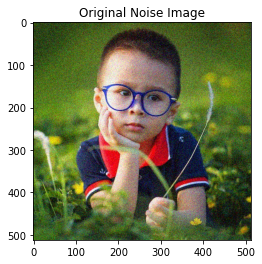

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "data/images/gaussian-noise.png"

# Load an image
img = cv2.imread(filename)

# Show The Original Input Image
plt.imshow(img[...,::-1])
plt.title("Original Noise Image")
plt.show()

In the following code, Gaussian blur is applied using two different kernels.

The first is a 5x5 kernel with `sigmaX` and `sigmaY` set to 0. OpenCV automatically calculates `sigma` when it is set to 0.

The second is a 25x25 kernel with `sigmaX` and `sigmaY` set to 50.

In [62]:
# Apply Gaussian Blur
gausssian_kernel5 = cv2.GaussianBlur(img, (5,5), 0,0)
gausssian_kernel25 = cv2.GaussianBlur(img, (25,25), 50,50)

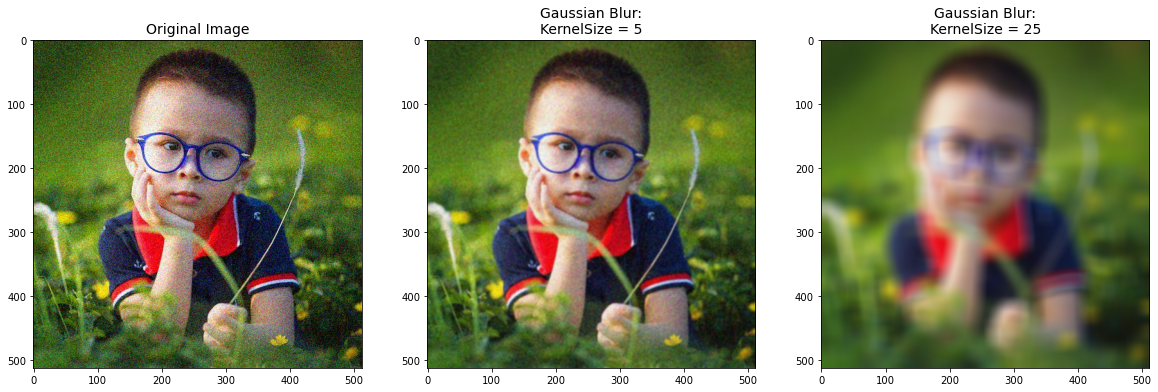

In [63]:
# Show the result
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image", fontsize=14)
plt.subplot(132);plt.imshow(gausssian_kernel5[...,::-1]);plt.title("Gaussian Blur:\nKernelSize = 5", fontsize=14)
plt.subplot(133);plt.imshow(gausssian_kernel25[...,::-1]);plt.title("Gaussian Blur:\nKernelSize = 25", fontsize=14)
plt.show()

# <font style = "color:rgb(50,120,229)">Median Filter</font>

Median blur filtering is a nonlinear filtering technique that is most commonly used to remove **salt-and-pepper** noise from images. As the name suggests, salt-and-pepper noise shows up as randomly occurring white and black pixels that are sharply different from the surrounding. In color images, salt-and-pepper noise may appear as small random color spots. 

The illustration below shows three images.The image on the left is the noisy image that we wish to filter. In the center, we show the image filtered using a Gaussian filter and on the right, we show the image filtered using a Median Filter. Clearly, median blur filter performs better on salt-and-pepper noise.

| <center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-original.png"/></center>  |<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-GaussianBulrsigma5.png"/></center> | <center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-MedianBlurimage.png"/></center> |
| -------- | -------- | -------- |
| <center>Original Image</center>     | <center>Gaussian blur with sigma 5</center> | <center>Median Blur Filter </center>     |

In OpenCV’s implementation of the median blur, a square kernel is used. The dimension of the square must be an odd integer greater than 1. For an image, the median blurring filter replaces the value of the central pixel with the median of all the pixels within the kernel area. As you can imagine, in median filtering, the filtered value at any pixel is one of the pixel values in its neighbourhood specified by the kernel.

Let’s see how median filtering removes salt-and-pepper noise. Consider a 3x3 patch in a grayscale image as shown below. 

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 255 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

Notice, the value at the center pixel is way higher than the neighbors. It is likely that the center pixel is corrupted with salt-and-pepper noise.

**If we use a box filter to remove this noise,** the center pixel will be the average of all pixels in the 3x3 neighborhood. The center pixel value after box filtering will be 

$$\frac{30 + 32 + 29 + 31 + 255 + 35 + 35 + 30 + 33}{9} = 57$$

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 57 & 35\\
35 & 30 & 33
\end{bmatrix}
$$


Which is better than before, but still high compared to the neighboring pixels. 

Now, let’s use a median filter. The median filter takes in only the pixel values in the neighbourhood of the central pixel, sorts the list of values and then replaces the value of the central pixel with the median value of the sorted list. In this case, the sorted list becomes 

$$[29, 30, 30, 31, 32, 33, 35, 35, 255]$$

Thus, the median value is 32, and we replace the central pixel with 32. Voila! The noise is gone.
$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 32 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

This is repeated for each pixel of the image.

## <font style = "color:rgb(50,120,229)">Median Blur in OpenCV</font>

Median blur is implemented using the function [**`medianBlur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) in OpenCV. Its usage is straightforward. 

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.medianBlur(	src, ksize[, dst]	)
```

**Parameters**
- **`src`**	input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
- **`dst`**	destination array of the same size and type as src.
- **`ksize`**	aperture linear size; it must be odd and greater than 1, for example: 3, 5,7, ...

Time to look at some code in action!

In [6]:
filename = DATA_PATH + "images/salt-and-pepper.png"

img = cv2.imread(filename)

Apply Median Blurring. First, we define a kernel of size 5. Then we perform median blurring using the `cv2.medianBlur` function and store it in numpy array `medianBlurred`

Text(0.5, 1.0, 'Median Blur Result : KernelSize = 5')

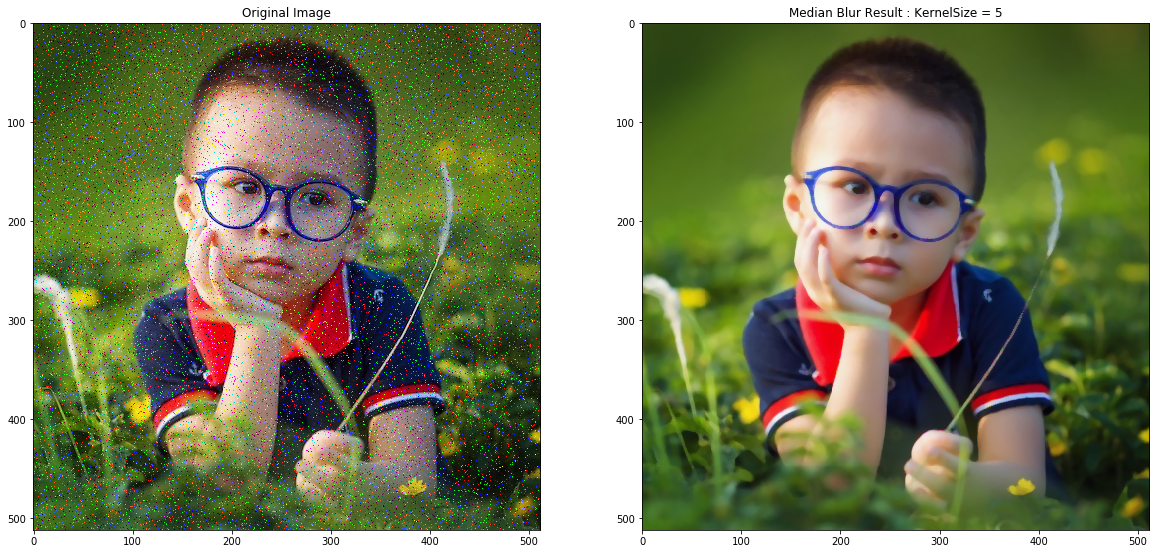

In [7]:
# Defining the kernel size
kernelSize = 5

# Performing Median Blurring and store it in numpy array "medianBlurred"
medianBlurred = cv2.medianBlur(img,kernelSize)

# Display the original and median blurred image
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Blur Result : KernelSize = 5")

# <font style = "color:rgb(50,120,229)">Bilateral Filtering</font>

A **Bilateral Filter** is nonlinear, edge-preserving and noise-reducing smoothing filter. Most smoothing filters (e.g. a Gaussian or a Box filter) have a parameter called $\sigma_s$ (the s in the subscript stands for "spatial") that determines the amount of smoothing. Often this value is closely related to the kernel size. A typical smoothing filter replaces the intensity value of a pixel by the weighted sum of its neighbors. The bigger the neighborhood, the smoother the filtered image looks. The size of the neighborhood is directly proportional to the parameter $\sigma_s$.

In edge-preserving filters, there are two competing objectives :

1. Smooth the image.

2. Don’t smooth the edges / color boundaries. 

In other words, if we want to preserve edges, we cannot simply replace the color of a pixel by the weighted sum of its neighbors. 

Consider this 3x3 image patch, shown below.
$$
\begin{bmatrix}
30 & 200 & 239\\
31 & 220 & 235\\
35 & 210 & 233
\end{bmatrix}
$$

You can see the values in the left column are much lower than the values in the center and the right columns. In other words, this patch is part of a vertical edge. In a typical filtering operation, we replace the center pixel by some weighted combination of all 9 pixels in this 3x3 neighborhood. However, in this case, a better idea is to filter the center pixel based on only the center and right-hand side columns so that the edge is retained and not blurred-out. 

In bilateral filtering, while calculating the contribution of any pixel to the final output, we weigh the pixels that are close in terms of intensity to the center pixel higher as compared to the pixels whose intensities are very different from the center pixels. We want to find a weight that depends on the square of the intensity difference  ($I_p$ − $I_q$)$^2$  between the center pixel q and its neighbor p. But if you are a control freak, like most AI scientists, you will want more control over your definition of intensity difference. We can redefine intensity difference as the Gaussian function $$G_{\sigma_{r}} ( I_{p} − I_{q} )$$  and control the meaning of intensity differences using the parameter $\sigma_r$.
 
Additionally, just like Gaussian filtering, we also want to weight the pixels that are closer to the center pixel higher than the pixels that are farther away. So, the weights should depend on $|| p − q ||$. But again, you are likely a control freak and want to control the definition of distance. How do you do that? Well, you use a Gaussian $G_{\sigma_{s}} (|| p − q ||)$ and control the meaning of distance using the parameter $\sigma_s$. 

Combining the two, a bilateral filter will output the following at center pixel q. 

$$
O_{q} = \frac{1}{W_{p}}\sum_p G_{\sigma_{s}} (|| p − q ||) G_{\sigma_{r}} ( I_{p} − I_{q} )
$$

Where, 

$W_p$ = The normalization constant

$G_{\sigma_{s}}$= Spatial Gaussian kernel

$G_{\sigma_{r}}$ = Color / Range Gaussian kernel

q = Center pixel

p = Neighboring pixel

$I_p$  = Intensity at pixel p

$I_q$ = Intensity at pixel q



If the neighborhood pixels are edges, the difference in intensity $(I_p - I_q)$ will be higher. Since the Gaussian is a decreasing function, $G_{\sigma_{r}}(I_p - I_q)$ will have lower weights for higher values. Hence, the smoothing effect will be lower for such pixels, preserving the edges. 

To conclude, for bilateral filtering, we have two parameters : $\sigma_s$ and $\sigma_r$. Just like other smoothing filters $\sigma_s$ controls amount of spatial smoothing, and $\sigma_r$ (for sigma_range) controls how dissimilar colors within the neighborhood will be averaged. A higher $\sigma_r$ results in larger regions of constant color. Let’s have a look at the code. 

## <font style="color:rgb(50,120,229)">Bilateral Filter in OpenCV</font>

First, here is the [**`Bilateral filter`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed) in OpenCV. 

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.bilateralFilter(	src, d, sigmaColor, sigmaSpace[, dst[, borderType]]	)
```

**Parameters**

- **`src`**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **`dst`**	Destination image of the same size and type as src .
- **`d`**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **`sigmaColor`**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **`sigmaSpace`**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **`borderType`**	border mode used to extrapolate pixels outside of the image, see BorderTypes

The tutorial below shows an example usage and results for a bilateral filter.

In [9]:
img = cv2.imread(DATA_PATH+"images/gaussian-noise.png")

# Check for invalid input
if img is None:  
  print("Could not open or find the image")

First we specify the parameters used in the bilateral filter. The first parameter we specify is the diameter of the pixel neighbourhood that we will use for filtering. Next we specify the standard deviations in color space and coordinate space. The filtered image is stored in numpy array ‘bilateralFiltered’.

Text(0.5, 1.0, 'Bilateral Blur Result')

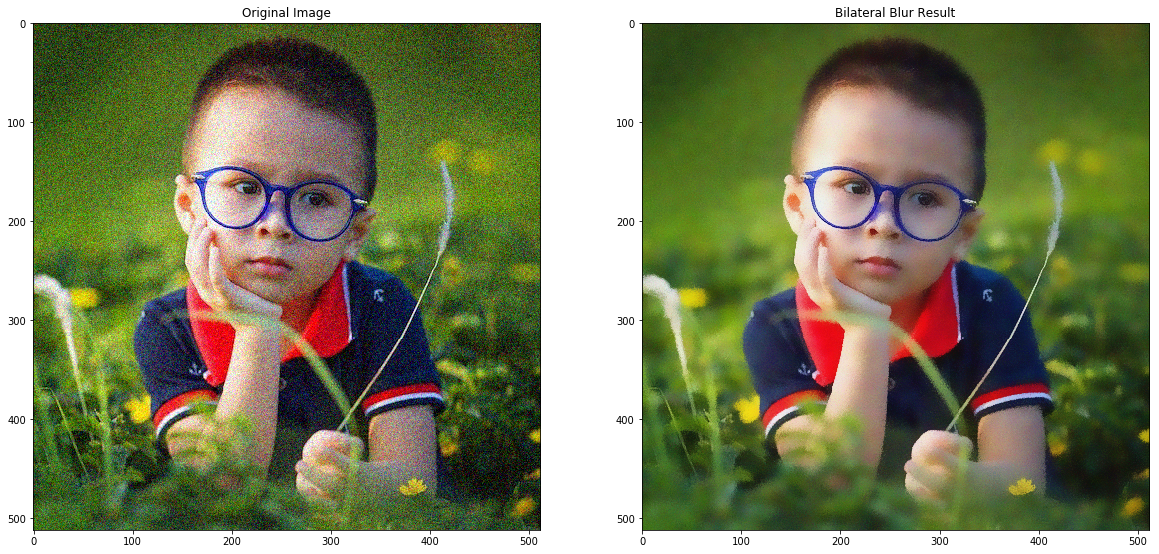

In [10]:
# diameter of the pixel neighbourhood used during filtering
dia=15;

# Larger the value the distant colours will be mixed together 
# to produce areas of semi equal colors
sigmaColor=80

# Larger the value more the influence of the farther placed pixels 
# as long as their colors are close enough
sigmaSpace=80

#Apply bilateralFilter
result = cv2.bilateralFilter(img, dia, sigmaColor, sigmaSpace)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("Bilateral Blur Result")

# <font style = "color:rgb(50,120,229)">Bilateral vs Median: Comparison under different noise conditions</font>

Image-smoothing filters like Gaussian blur, median filtering and bilateral filtering are often used for noise reduction. In this section, we go over the various noise conditions and the right filter for the job. 

Try out the filters on other images. e.g 
1. use `salt-and-pepper.png` for gaussian and bilateral filters and experiment with different values of kernel size and sigma.
1. use `gaussian-noise.jpg` for median filter.

We show the comparison results and leave it upto you to check what values of the kernels produce such results.

## <font style = "color:rgb(50,120,229)">Salt-And-Pepper Noise</font>

A median filter gives much better results than a bilateral filter when the image contains salt-and-pepper noise.

<table style="width:100%">
  <tr>
    <th><center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-SaltPepperNoise.png"/></center></th>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-MedianBlurimage.png"/></center></th>
        <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-BilateralFiltering.png"/></center></th>
  </tr>
  <tr>
    <td><center>Image with salt-pepper noise</center></td>
    <td><center>Median Filtering</center></td>
    <td><center>Bilateral Filtering</center></td>
  </tr>
    <tr>
    <th colspan="3"><center>Comparison of the blurring techniques in the presence of salt and pepper noise.</center></th>
  </tr>
</table>


## <font style = "color:rgb(50,120,229)">Gaussian Noise</font>

A bilateral filter is able to smooth out the noise better than a median filter.

<table style="width:100%">
  <tr>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-3.1-convolutionresult.png"/></center></th>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-MedianFilering.png"/></center></th>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-BilateralFiltering.png"/></center></th>
  </tr>
  <tr>
    <td><center>Image with Gaussian Noise</center></td>
    <td><center>Median Filtering</center></td>
    <td><center>Bilateral Filtering</center></td>
  </tr>
    <tr>
    <th colspan="3"><center>Comparison of the blurring techniques in the presence of Gaussian Noise.</center></th>
  </tr>
</table>


## <font style = "color:rgb(50,120,229)">Excessive smoothing</font>

The median filter fails to preserve edges for higher kernel sizes. The bilateral filter can produce much better edge-preserved smoothing by varying the two kernel sizes as required.

<table style="width:100%">
  <tr>
    <th><center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcva4face-w2-m3.1-GaussianNoise.png"/></center></th>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-heavilyBlurredMedianFilter.png"/></center></th>
    <th><center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-heavilyBlurredBilateralFilter.png"/></center></th>
  </tr>
  <tr>
    <td><center>Image with Gaussian Noise</center></td>
    <td><center>Heavily blurred Median Filter</center></td>
    <td><center>Heavily blurred Bilateral Filter</center></td>
  </tr>
    <tr>
        <th colspan="3"><center>Comparison of blurring techniques when very high level of smoothing is required.</center></th>
  </tr>
</table>

#### <font style = "color:rgb(200,0,0)"> Note </font>

The following should be noted while deciding which filter to use for your problem :

1. **Median filtering** is the best way to smooth images which have salt-pepper type of noise (sudden high / low values in the neighborhood of a pixel).

2. **Gaussian filtering** can be used if there is low Gaussian noise.

3. **Bilateral Filtering** should be used if there is high level of Gaussian noise, and you want the edges intact while blurring other areas.

4. In terms of execution speed, Gaussian filtering is the fastest and Bilateral filtering is the slowest. 